### CM4107 Advanced Artifical Intelligence


# Section 1 - Dataset

The dataset used is the zeroshot/twitter-financial-news-sentiment, this hosts over 9000 Twitter tweets related to financial news.

The tweets are organized into three labels, bearish(negative), bullish(positive), or neutral. The goal in this report is text classification, to correctly classify the tweets. NLP will be useful for this task as every tweet is directly stating positive, negative, or neutral statements casually, so Natural Language Processing techniques are particularly suited for this task.

This dataset was useful as it was also completely in English, not requiring any translation or language filtering.

The dataset was acquired and loaded through Huggingface here:

https://huggingface.co/datasets/zeroshot/twitter-financial-news-sentiment.

In [2]:
import pandas as pd
import io
from google.colab import files
from google.colab import userdata
userdata.get('huggingface')

splits = {'train': 'sent_train.csv', 'validation': 'sent_valid.csv'}
df = pd.read_csv("hf://datasets/zeroshot/twitter-financial-news-sentiment/" + splits["train"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [3]:
print(df)

                                                   text  label
0     $BYND - JPMorgan reels in expectations on Beyo...      0
1     $CCL $RCL - Nomura points to bookings weakness...      0
2     $CX - Cemex cut at Credit Suisse, J.P. Morgan ...      0
3     $ESS: BTIG Research cuts to Neutral https://t....      0
4     $FNKO - Funko slides after Piper Jaffray PT cu...      0
...                                                 ...    ...
9538  The Week's Gainers and Losers on the Stoxx Eur...      2
9539  Tupperware Brands among consumer gainers; Unil...      2
9540  vTv Therapeutics leads healthcare gainers; Myo...      2
9541    WORK, XPO, PYX and AMKR among after hour movers      2
9542             YNDX, I, QD and OESX among tech movers      2

[9543 rows x 2 columns]


In [4]:
import numpy as np

x = df[['text']].to_numpy()
y = df['label'].to_numpy()

print(x[0])
print(x[1])
print(y[0])

['$BYND - JPMorgan reels in expectations on Beyond Meat https://t.co/bd0xbFGjkT']
['$CCL $RCL - Nomura points to bookings weakness at Carnival and Royal Caribbean https://t.co/yGjpT2ReD3']
0


In [13]:
import nltk
import re
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer("english")

def prep(X):
      prep_text = []
      for x in X:

            decoded_text = x[0].decode('utf-8') if isinstance(x[0], bytes) else x[0]

            remove_URLS = re.sub(r'http\S+', '', decoded_text)

            token_text = word_tokenize(remove_URLS)

            normd_text = [token.lower() for token in token_text]

            stopword_text = [token for token in normd_text if token not in stopwords.words('english')]

            #prep_text += [[lemmatizer.lemmatize(word) for word in stopword_text]]
            prep_text += [[stemmer.stem(word) for word in stopword_text]]

            prep_sentences = [" ".join(sentence) for sentence in prep_text]

      return prep_sentences

prep_x = prep(x)
print(prep_x[0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


$ bynd - jpmorgan reel expect beyond meat


# Section 2 - Representation Learning

Word2Vec was utilised in this task due to reliability in capturing the relationships between words unlike other text vectorization techniques which simply look at word frequency. Word2Vec uses either continuous bag of words (CBOW) or continuously sliding skip-gram, with CBOW using the words in the context window to predict which word should come next in the context, versus continuously sliding skip-gram which uses the current word to predict the current window.

Word2Vec then vectorizes the words so that semantically similar words are closer together and dissimilar words are farther apart.

This is useful for this dataset as different but semantically similar words will often appear in different tweets such as "profit" and "gain". Word2Vec would use the context of these words to better vectorize the dataset.

As well, Word2Vec is especially suited for informal words and financial jargon as Word2Vec would embed the words aware of the context surrounding them.

In [6]:
from gensim.models import Word2Vec

def word2vec_rep(sentence, w2v_model):
  embs = [w2v_model.wv[word] for word in sentence if word in w2v_model.wv.index_to_key]

  if len(embs) == 0:
    return np.zeros(w2v_model.vector_size)

  sent_emb = np.mean(np.array(embs), 0)

  return sent_emb


#Section 3 - Algorithms

##Multi-Layer Perceptron (MLP)
Multi-Layer Perceptron (MLP) is a type of neural network consisting of input, hidden, and output layers, hence the name multi-layer. The purpose is to model the relationships between the inputs and outputs. Using interconnected nodes connecting the input nodes to one or more hidden layers with weights and biases determining the strength and direction of the connections.

The goal of training an MLP is to maximize the accuracy through adjusting the weights and biases which is achieved through backpropagation. This involves updating the weights and biases with respect to the loss function to get a better result.

##Multinomial Naive Bayes
Multinomial Naive Bayes is an algorithm based on the Bayes' theorem. It is popular with text classification tasks. Naive Bayes is naïve as it assumes each feature is independent of one another.

Multinomial Naive Bayes is a classifier created to calculate the probability distribution of text-data by calculating the count and frequency of features.

This makes MultinominalNB well-suited to the chosen dataset as well as its efficiency which sped up classification.

##Logistic regression
Logistic Regression is an algorithm used for classification, despite the name. It classifys the input through the sigmoid function, this takes the input and creates a probablilty between 0 and 1, if this value is above the threshold (usually 0.5) it is in class 1 if below, class 0.

For this task, there are three classes, so multinomial logistic regression was used, this allows three or more unordered types.


##Random Forest
Random forest is an algorithm with many uses including classification. Random forest are suited for large complex datasets which doesn't describe the chosen dataset especially well.

I chose this dataset as the previous algorithms all resulted in similar results and adding random forest could maybe offer some insight into why.

Random forest uses a set of decision trees created from training data to vote on the predictions.

In [14]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#knn_score = []
mlp_score = []
nb_score = []
lr_score = []
rf_score = []

kf = StratifiedKFold(n_splits=5)
prepn_x = np.array(prep_x)

for train, test in kf.split(prepn_x,y):

  x_train, x_test, y_train, y_test = prepn_x[train], prepn_x[test], y[train], y[test]

  #print(x_train[0])
  test_x_train = [word_tokenize(sentence) for sentence in x_train]
  #print(test_x_train[0])

  w2v_model = Word2Vec(vector_size=300, window=5, min_count=3, workers=4)
  w2v_model.build_vocab(test_x_train, update=None)
  w2v_model.train(corpus_iterable=test_x_train, total_examples=len(test_x_train), epochs=10)

  x_train_representations = [word2vec_rep(instance, w2v_model) for instance in x_train]
  x_test_representations = [word2vec_rep(instance, w2v_model) for instance in x_test]

  scaler = MinMaxScaler()

  x_train_representations = scaler.fit_transform(x_train_representations)
  x_test_representations = scaler.transform(x_test_representations)

  #kNN = KNeighborsClassifier(n_neighbors=3)
  #kNN.fit(x_train_representations, y_train)
  #knn_predictions = kNN.predict(x_test_representations)
  #knn_acc = accuracy_score(knn_predictions, y_test)
  #knn_score.append(knn_acc)

  nb = MultinomialNB(alpha=1)
  nb.fit(x_train_representations, y_train)
  nb_predictions = nb.predict(x_test_representations)
  nb_acc = accuracy_score(nb_predictions, y_test)
  nb_score.append(nb_acc)

  mlp = MLPClassifier(alpha=1, max_iter=128)
  mlp.fit(x_train_representations, y_train)
  mlp_predictions = mlp.predict(x_test_representations)
  mlp_acc = accuracy_score(mlp_predictions, y_test)
  mlp_score.append(mlp_acc)

  lr = LogisticRegression(random_state=2, max_iter=500).fit(x_train_representations, y_train)
  lr_predictions = lr.predict(x_test_representations)
  lr_acc = accuracy_score(lr_predictions, y_test)
  lr_score.append(lr_acc)

  rf = RandomForestClassifier(max_depth=2, random_state=0)
  rf.fit(x_train_representations, y_train)
  rf_predictions = rf.predict(x_test_representations)
  rf_acc = accuracy_score(rf_predictions, y_test)
  rf_score.append(rf_acc)

#print("kNN Accuracy:", np.mean(knn_score))
print("NB Accuracy:", np.mean(nb_score))
print("MLP Accuracy:", np.mean(mlp_score))
print("LR Accuracy", np.mean(lr_score))
print("RF Accuracy", np.mean(rf_score))

NB Accuracy: 0.6442411154050163
MLP Accuracy: 0.640259918536602
LR Accuracy 0.6516803884940913
RF Accuracy 0.6382701711961326


#Section 4 - Evaluation

The results below show how four algorithms had very similar results. This could be for a variety of reasons.

It could be that the algorithms were not the right fit. I don't believe this could be the case as some algorithms used a very dissimilar to others, so results would have greater difference if that was the case.

It could be over-fitting with preprocessing. I thoroughly tested this and editing the preprocessing done with no result to the accuracy.

It could be a result of the dataset. The dataset contains tweets which contains much informal language and slang which can make sentiment classification challenging.

[Text(1, 0, 'nb'), Text(2, 0, 'mlp'), Text(3, 0, 'lr'), Text(4, 0, 'rf')]

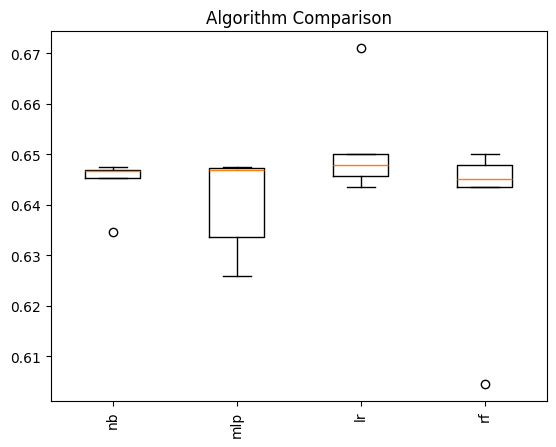

In [15]:
import matplotlib as plt

comparison = []
#comparison.append(knn_score)
comparison.append(nb_score)
comparison.append(mlp_score)
comparison.append(lr_score)
comparison.append(rf_score)

fig, ax2 = plt.pyplot.subplots()
ax2.set_title('Algorithm Comparison')
ax2.boxplot(comparison)
ax2.set_xticklabels(['nb', 'mlp', 'lr', 'rf'], rotation='vertical')